# Tutorial notebook for dinucleotide forces computation

We will take an example genome and we will use it as working example to test the function of the scripts.

In [1]:
# load the genome - this is an Influenza H5N1 PB2 segment, strain used: A/Anhui/1/2005

sequence = 'ATGGAGAGAATAAAAGAATTAAGGGATCTAATGTCACAGTCCCGCACTCGCGAGATACTAACAAAAACCACTGTGGACCATATGGCCATAATCAAGAAGTACACATCAGGAAGACAAGAGAAGAACCCTGCTCTCAGAATGAAATGGATGATGGCAATGAAATATCCAATCACAGCGGACAAGAGAATAACAGAGATGATTCCTGAAAGGAATGAACAAGGGCAGACGCTCTGGAGCAAGACAAATGATGCCGGATCGGACAGGTTGATGGTGTCTCCCTTAGCTGTAACTTGGTGGAATAGGAATGGGCCGACGACAAGTGCAGTCCATTATCCAAAGGTTTACAAAACATACTTTGAGAAGGCTGAAAGGCTAAAACATGGAACCTTCGGTCCCGTCCATTTTCGAAACCAAGTTAAAATACGCCGCCGAGTTGATATAAATCCTGGCCATGCAGATCTCAGTGCTAAAGAAGCACAAGATGTCATCATGGAGGTCGTTTTCCCAAATGAAGTGGGAGCTAGAATATTGACATCAGAGTCACAATTGACAATAACGAAAGAGAAGAAAGAAGAGCTCCAAGATTGTAAGATTGCTCCCTTAATGGTTGCATACATGTTGGAAAGGGAACTGGTCCGCAAAACCAGATTCCTACCGGTAGCAAGCGGAACAAGCAGTGTGTACATTGAGGTATTGCATTTGACTCAAGGGACCTGCTGGGAACAGATGTACACTCCAGGCGGAGAAGTGAGAAACGACGATGTTGACCAGAGTTTGATCATCGCTGCCAGAAACATTGTTAGGAGAGCAACGGTATCAGCGGATCCACTGGCATCACTGCTGGAGATGTGTCACAGCACACAAATTGGTGGGATAAGGATGGTGGACATCCTTAGGCAAAACCCAACTGAGGAACAAGCTGTGGGTATATGCAAAGCAGCAATGGGTCTGAGGATCAGTTCATCCTTTAGCTTTGGAGGCTTCACTTTCAAAAGAACAAGTGGATCATCCGTCACGAAGGAAGAGGAAGTGCTTACAGGCAACCTCCAAACATTGAAAATAAGAGTACATGAGGGGTATGAAGAGTTCACAATGGTTGGACGGAGGGCAACAGCTATCCTGAGGAAAGCAACTAGAAGGCTGATTCAGTTGATAGTAAGTGGAAGAGACGAACAATCAATCGCTGAGGCAATCATTGTAGCAATGGTGTTCTCACAGGAGGATTGCATGATAAAGGCAGTCCGGGGCGATTTGAATTTCGTAAACAGAGCAAACCAAAGATTAAACCCCATGCATCAACTCCTGAGACATTTTCAAAAGGACGCAAAAGTGCTATTTCAGAATTGGGGAATTGAACCCATTGATAATGTCATGGGGATGATCGGAATATTACCTGACCTGACTCCCAGCACAGAAATGTCACTGAGAAGAGTAAGAGTTAGTAAAGTGGGAGTGGATGAATATTCCAGCACTGAGAGAGTAATTGTAAGTATTGACCGTTTCTTAAGGGTTCGAGATCAGCGGGGGAACGTACTCTTATCTCCCGAAGAGGTCAGCGAAACCCAGGGAACAGAGAAATTGACAATAACATATTCATCATCAATGATGTGGGAAATCAACGGTCCTGAGTCAGTGCTTGTTAACACCTATCAATGGATCATCAGAAACTGGGAAACTGTGAAGATTCAATGGTCTCAAGACCCCACGATGCTGTACAATAAGATGGAGTTTGAACCGTTCCAATCCTTGGTACCTAAGGCTGCCAGAGGTCAATACAGTGGATTTGTGAGAACACTATTCCAACAAATGCGTGACGTACTGGGGACATTTGATACTGTCCAGATAATAAAGCTGCTACCATTTGCAGCAGCCCCACCAGAGCAGAGCAGAATGCAGTTTTCTTCTCTAACTGTGAATGTGAGAGGCTCAGGAATGAGAATACTCGTAAGGGGCAATTCCCCTGTGTTCAACTACAATAAGGCAACCAAAAGGCTTACCGTTCTTGGAAAGGACGCAGGTGCATTAACAGAGGATCCAGATGAGGGGACAACCGGAGTGGAGTCTGCAGTACTGAGGGAATTCCTAATTCTAGGCAAGGAGGACAAAAGATATGGACCAGCATTGAGTATCAATGAACTGAGCAACCTTGCGAAAGGGGAGAAAGCTAATGTGCTGATAGGACAAGGAGACGTGGTGTTGGTAATGAAACGGAAACGGGACTCTAGCATACTTACTGACAGCCAGACAGCGACCAAAAGAATTCGGATGGCCATCAATTAG'

## Non-coding forces

In [3]:
import forces_noncoding_multi

Let's start by computing the force on the CpG motif along the full genome:

In [4]:
motifs = ['CG']

forces_noncoding_multi.compute_force_noncoding(seq=sequence, motifs=motifs)

Not using sliding windows.


array([-0.76788563])

When no nucleotide bias is specified, it is computed directly from the sequence. 
A bias can be specified as follows:

In [5]:
nt_bias = [0.25, 0.25, 0.25, 0.25] # probs for A, C, G, T

motifs = ['CG']

forces_noncoding_multi.compute_force_noncoding(seq=sequence, motifs=motifs, freqs=nt_bias)

Not using sliding windows.


array([-1.04766265])

The script easily allow to compute forces on two or more dinucleotides:

In [6]:
motifs = ['CG', 'TA']

forces_noncoding_multi.compute_force_noncoding(seq=sequence, motifs=motifs)

Not using sliding windows.


array([-0.91495079, -0.72776952])

Notice how the CpG force changed, due to the fact that differnt motifs interact. 
The computation of many motifs together makes the execution slower, since a trick exploiting an analytic result cannot be used anymore. 
Moreover, keep in mind that for some dinucleotide combinations the system of equations solved to obtain forces is underdetermined.

For long genomes, one may want to compute the force locally. The script allows to do that by specifiyng the lenght of the sliding window. Let us do it, and plot the resulting forces.

In [7]:
from matplotlib import pyplot as plt
import numpy as np

In [8]:
motifs = ['CG']
swl = 900

# compute local forces
local_forces = forces_noncoding_multi.compute_force_noncoding(seq=sequence, motifs=motifs, sliding_window_length=swl)

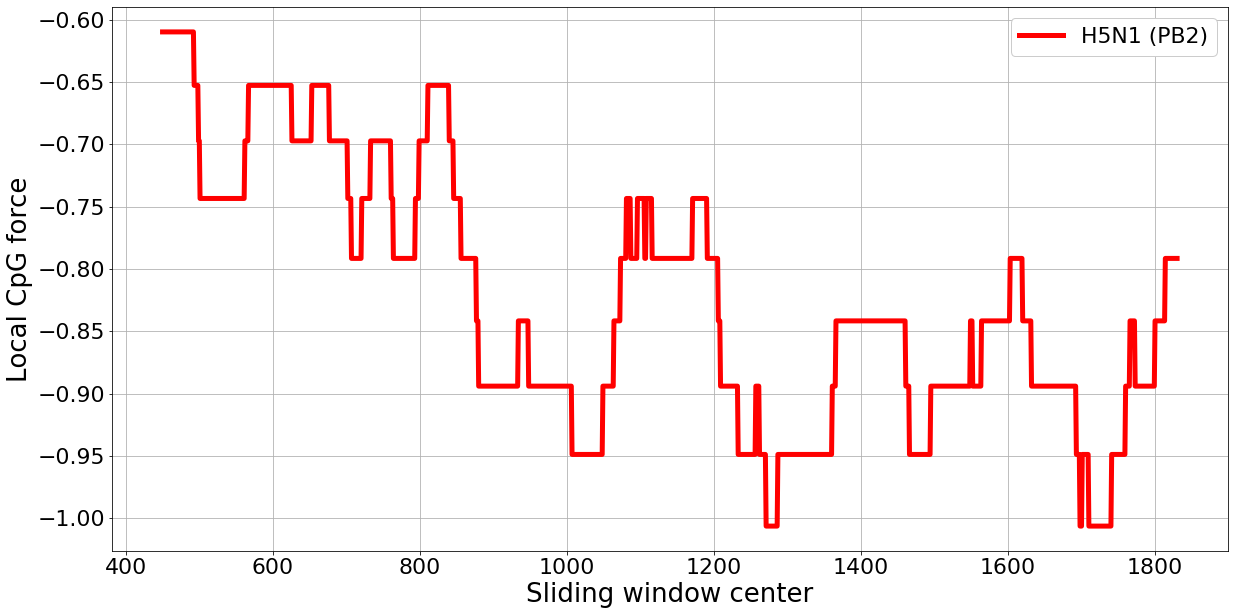

In [9]:
# make plot
x1 = np.arange(0, len(local_forces))
y1 = local_forces
plt.figure(figsize=(20, 10))
plt.plot(x1 + swl/2, y1, '-', color='red', linewidth=5, label='H5N1 (PB2)', zorder=10)
plt.legend(prop={'size': 22}, framealpha = 1)
plt.xlabel('Sliding window center',fontsize=26)
plt.ylabel('Local CpG force',fontsize=26)
plt.xticks(fontsize=22, rotation=0)
plt.yticks(fontsize=22, rotation=0)
plt.grid()

For some applications it may be useful to compute the log-likelihood of a given sequence according to the model. This can be done, with the present script, only for global forces. For example, let's compute the log-likelihood of our sequence under the CpG and TpA forces we have computed before:

In [10]:
forces = [-0.47145428, -0.45925714]
motifs = ['CG', 'TA']

forces_noncoding_multi.compute_log_probability(seq=sequence, forces=forces, motifs=motifs)

-3071.3545983562803

Also in this case, a different nucleotide bias can be specified through the freqs variable.

## Coding forces
We will do again here everything we did in the non-coding case, but now using the script taking into account codons. 
Notice that, since the coding constraint are changing the underlying model, the results change.

In [11]:
import forces_coding_multi

The usage of the script to compute the force on the full sequence is similar to the non-coding case.

In [12]:
motifs = ['CG']

forces_coding_multi.compute_forces_coding(seq=sequence, motifs=motifs)

Not using sliding windows.


array([-0.33666279])

When no codon bias is specified, it is computed directly from the sequence. 
A bias can be specified as a dictionary; notice that the frequencies of all the condons coding for the samea amino acid needs to have unit sum for the results to be meaningful.

In [13]:
my_bias= {'AAA' : 0.42, 'CAA' : 0.25, 'GAA' : 0.42, 'TAA' : 0.28, 'ACA' : 0.28, 'CCA' : 0.27, 'GCA' : 0.23, 'TCA' : 0.15, 'AGA' : 0.20, 'CGA' : 0.11, 'GGA' : 0.25, 'TGA' : 0.52, 'ATA' : 0.16, 'CTA' : 0.07, 'GTA' : 0.11, 'TTA' : 0.07, 'AAC' : 0.54, 'CAC' : 0.59, 'GAC' : 0.54, 'TAC' : 0.57, 'ACC' : 0.36, 'CCC' : 0.33, 'GCC' : 0.40, 'TCC' : 0.22, 'AGC' : 0.24, 'CGC' : 0.19, 'GGC' : 0.34, 'TGC' : 0.55, 'ATC' : 0.48, 'CTC' : 0.20, 'GTC' : 0.24, 'TTC' : 0.55, 'AAG' : 0.58, 'CAG' : 0.75, 'GAG' : 0.58, 'TAG' : 0.20, 'ACG' : 0.12, 'CCG' : 0.11, 'GCG' : 0.11, 'TCG' : 0.06, 'AGG' : 0.20, 'CGG' : 0.21, 'GGG' : 0.25, 'TGG' : 1.00, 'ATG' : 1.00, 'CTG' : 0.41, 'GTG' : 0.47, 'TTG' : 0.13, 'AAT' : 0.46, 'CAT' : 0.41, 'GAT' : 0.46, 'TAT' : 0.43, 'ACT' : 0.24, 'CCT' : 0.28, 'GCT' : 0.26, 'TCT' : 0.18, 'AGT' : 0.15, 'CGT' : 0.08, 'GGT' : 0.16, 'TGT' : 0.45, 'ATT' : 0.36, 'CTT' : 0.13, 'GTT' : 0.18, 'TTT' : 0.45}
motifs = ['CG']

forces_coding_multi.compute_forces_coding(seq=sequence, motifs=motifs, codon_bias=my_bias)

Not using sliding windows.


array([-1.09850568])

As in the non-coding case, it is easy to compute the forces on more than one dinucleotide:

In [14]:
motifs = ['CG', 'TA']

forces_coding_multi.compute_forces_coding(seq=sequence, motifs=motifs)

Not using sliding windows.


array([-0.37393301, -0.40936641])

A sliding window length can be specified as a number of nucleotides. Notice that if no codon_bias variable is provided, then the codon bias is computed for each sliding window, and this may raise errors if the sliding window length is too small.

In [15]:
motifs = ['CG']

# compute local forces
local_forces_coding = forces_coding_multi.compute_forces_coding(seq=sequence, motifs=motifs, 
                                                                sliding_window_length=900, codon_bias=my_bias)

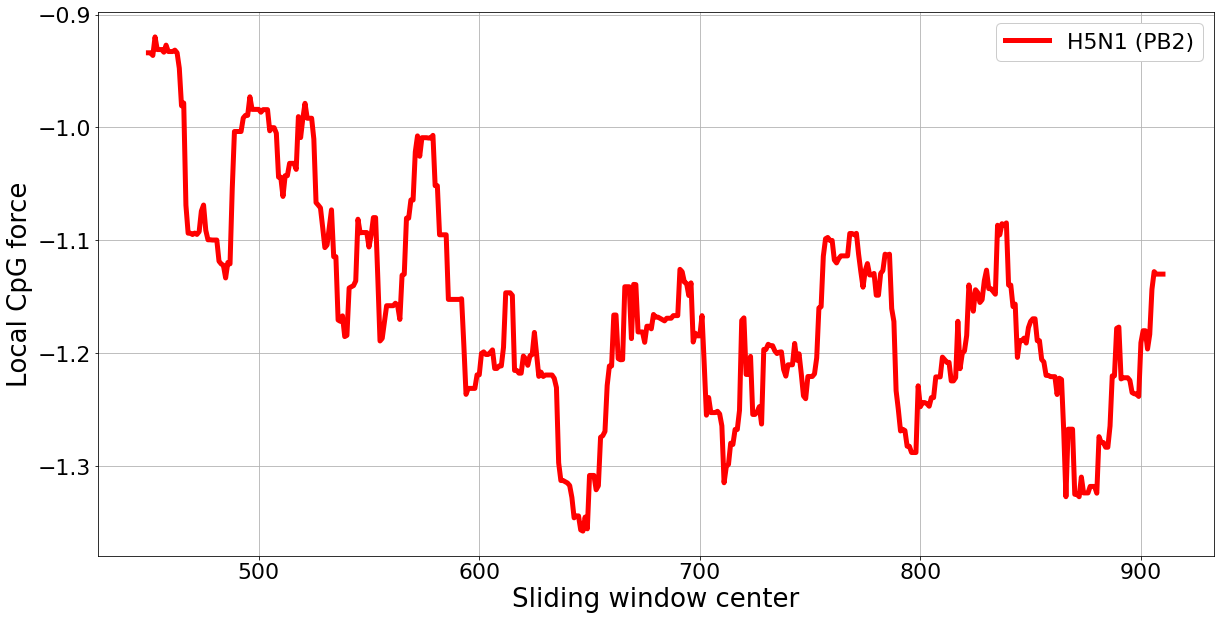

In [16]:
# make plot
x1 = np.arange(0, len(local_forces_coding))
y1 = local_forces_coding
plt.figure(figsize=(20, 10))
plt.plot(x1 + swl/2, y1, '-', color='red', linewidth=5, label='H5N1 (PB2)', zorder=10)
plt.legend(prop={'size': 22}, framealpha = 1)
plt.xlabel('Sliding window center',fontsize=26)
plt.ylabel('Local CpG force',fontsize=26)
plt.xticks(fontsize=22, rotation=0)
plt.yticks(fontsize=22, rotation=0)
plt.grid()

Also in the coding case, it is possible to compute the log-likelihood of the model when using global forces:

In [17]:
forces = [-0.37393301, -0.40936641]
motifs = ['CG', 'TA']

forces_coding_multi.compute_log_probability(seq=sequence, forces=forces, motifs=motifs, codon_bias=my_bias)

-887.1089114874641